In this kernel, I will be building a CNN from scratch for CIFAR 10 dataset loaded from keras. It is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images. We will try to find the best CNN model for this dataset.

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data() #load cifar 10 dataset from keras


In [97]:
# let's see the dimen of our training data!
print(x_train.shape)
print(y_train.shape)
#Looks like x_train has 50000 entries of dimen 32*32*3 and y_train has 50000 entries of dimen 1

(50000, 32, 32, 3)
(50000, 1)


In [88]:
# let's see the dimen of our testing data!
print(x_test.shape)
print(y_test.shape)
# As expected, similar to the shape of testing data

(10000, 32, 32, 3)
(10000, 10)


In [89]:
# how about we try to see the contents. Let's look at the first element of x_train
x_train[0]
# It is simply an array of numbers - Note that these numbers denote the pixel values(0-255)

array([[[0.23529412, 0.32156864, 0.21176471],
        [0.15686275, 0.26666668, 0.14117648],
        [0.20392157, 0.31764707, 0.20392157],
        ...,
        [0.20784314, 0.16862746, 0.19607843],
        [0.25882354, 0.21568628, 0.23921569],
        [0.28627452, 0.24313726, 0.26666668]],

       [[0.4392157 , 0.44705883, 0.44705883],
        [0.22745098, 0.2784314 , 0.21960784],
        [0.22745098, 0.31764707, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490198],
        [0.28235295, 0.24313726, 0.27058825]],

       [[0.6666667 , 0.6313726 , 0.69803923],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.3137255 , 0.34901962, 0.2901961 ],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.27450982, 0.24705882, 0.27450982],
        [0.28235295, 0.2509804 , 0.2784314 ]],

       ...,

       [[0.35686275, 0.44313726, 0.36862746],
        [0.23137255, 0.3254902 , 0.24313726],
        [0.1764706 , 0

In [90]:
y_train
# We know that all the images are labelled over 10 categories. 
#So, the y_train is a number between 0 to 10 where each number depicts one category.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
# time to re-scale so that all the pixel values lie within 0 to 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [92]:
# Let's see how it looks after re-scale
x_train[0]

array([[[0.00092272, 0.00126105, 0.00083045],
        [0.00061515, 0.00104575, 0.00055363],
        [0.00079969, 0.00124567, 0.00079969],
        ...,
        [0.00081507, 0.00066128, 0.00076894],
        [0.00101499, 0.00084583, 0.0009381 ],
        [0.00112265, 0.00095348, 0.00104575]],

       [[0.00172241, 0.00175317, 0.00175317],
        [0.00089196, 0.00109189, 0.00086121],
        [0.00089196, 0.00124567, 0.00081507],
        ...,
        [0.00083045, 0.0007228 , 0.00081507],
        [0.00103037, 0.00089196, 0.00099962],
        [0.00110727, 0.00095348, 0.00106113]],

       [[0.00261438, 0.00247597, 0.00273741],
        [0.00183007, 0.00181469, 0.00184544],
        [0.0012303 , 0.0013687 , 0.00113802],
        ...,
        [0.00086121, 0.00076894, 0.00086121],
        [0.00107651, 0.00096886, 0.00107651],
        [0.00110727, 0.00098424, 0.00109189]],

       ...,

       [[0.00139946, 0.00173779, 0.0014456 ],
        [0.00090734, 0.00127643, 0.00095348],
        [0.00069204, 0

In [93]:
no_of_classes = len(np.unique(y_train))
no_of_classes

2

In [94]:
import tensorflow.keras
# here, we are transforming y_train and y_test to be an array of size 10.
# The value of y_train/y_test as we saw earlier was a number from 0 to 9 each depicting one category.
# The value of y is represented by 1 in the corresponding array position and others are set to 0. 
# So, each row has only one item whose value will be 1 which depicts the category.
y_train = tensorflow.keras.utils.to_categorical(y_train,no_of_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test,no_of_classes)
y_test

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

In [95]:
# we are going to divide our training set into 2 sets - train and validation.
x_train,x_valid = x_train[5000:],x_train[:5000]
y_train,y_valid = y_train[5000:],y_train[:5000]
print(x_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 10, 2)


In [12]:
print(x_valid.shape)
print(y_valid.shape)

(5000, 32, 32, 3)
(5000, 10)


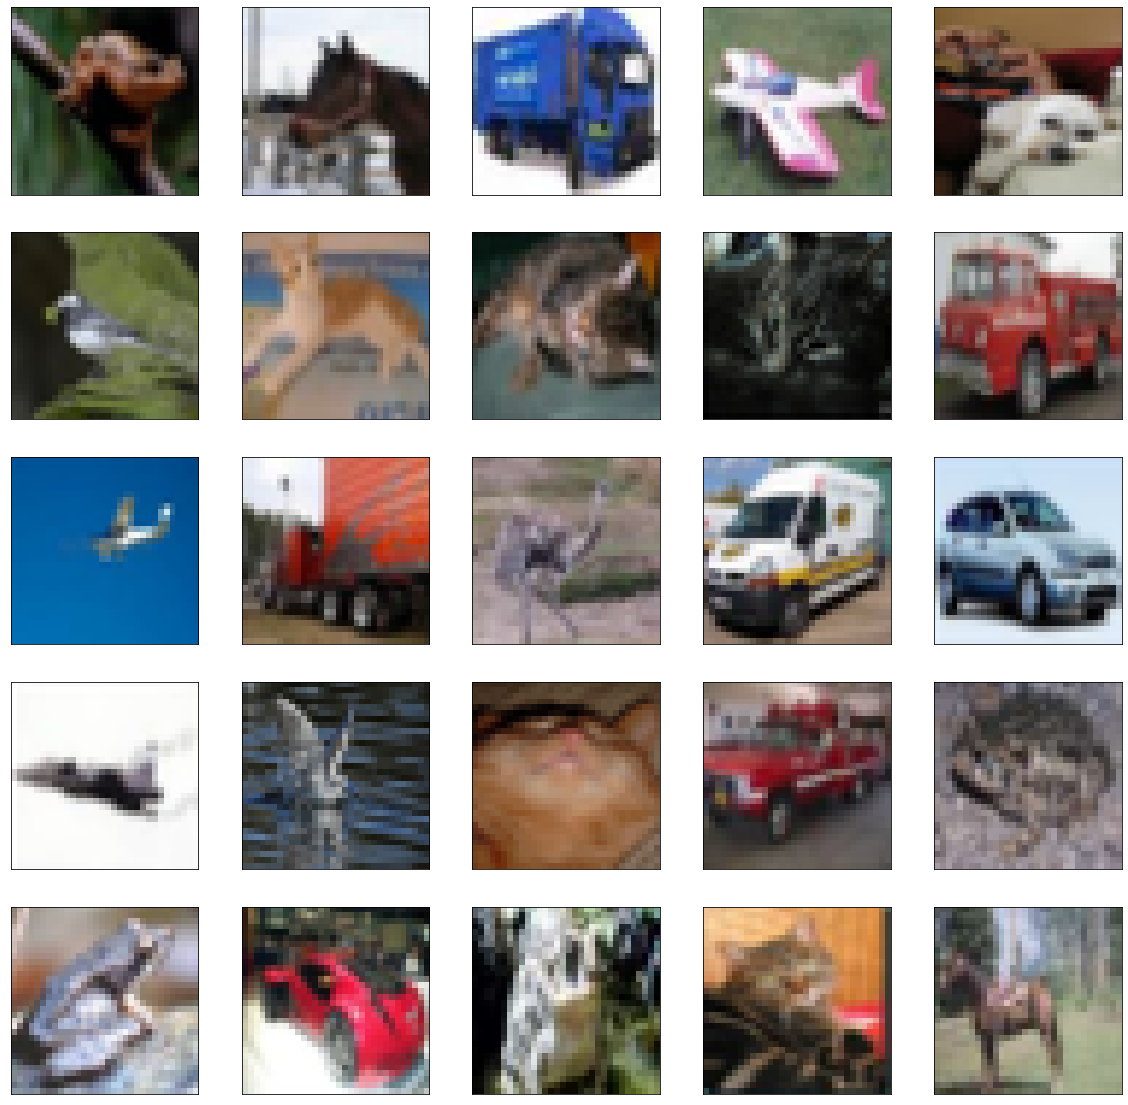

In [17]:
#let's visualize the first 50 images of training set
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    

In [45]:
# Time to create our model ! Simple use of convolutional and max pooling layers.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same',activation = 'relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=120, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 120)         30840     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 120)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 120)        

In [76]:
#Compile the model
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics=['accuracy'])
print('compiled!')

compiled!


In [85]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    
datagen.fit(x_train)

In [86]:
# start training
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

history = model.fit(datagen.flow(x_train, y_train,batch_size=32),
                                    validation_data=(x_valid, y_valid),
                                    epochs=15,
                                    callbacks=[checkpoint],
                                    verbose=2, 
                                    shuffle=True)

Epoch 1/15

Epoch 00001: val_loss improved from inf to 1.56374, saving model to best_model.h5
1407/1407 - 87s - loss: 2.0103 - accuracy: 0.2826 - val_loss: 1.5637 - val_accuracy: 0.4376
Epoch 2/15


KeyboardInterrupt: ignored

In [60]:
# # start training
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

# history = model.fit(x_train,y_train,batch_size=32, epochs = 10,
#           validation_data=(x_valid,y_valid),
#           callbacks=[checkpoint],
#           verbose=2, shuffle=True)

In [69]:
#Let's check the accuracy score of the best model on our test set
model.load_weights('best_model.h5')
score = model.evaluate(x_test,y_test,verbose=0)
score[1]
# Not bad ! we have an accuracy score of 68% on our test set.

0.7851999998092651

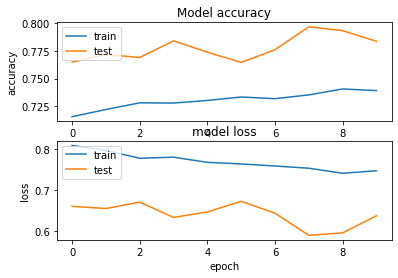

In [70]:
#Lets try to visualize the accuracy and loss over the epochs.
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

We can see that the accuracy starts increasing till it reaches around epoch 10 and then starts decreasing and just the opposite happens with loss which decreases till epoch 10 and then increases. Somewhere, around apoch 10 we have found our best model.